# Adiabatic Expansion

Problem solving approach:
1. Problem Statement  
2. Schematic  
3. Assumptions and Approximations  
4. Physical Laws  
5. Properties  
6. Calculations  
7. Reasoning  

## Problem Statement
Show that for an ideal gas in a closed system undergoing adiabatic expansion, that $ p V^\gamma = \text{const} $.

## Schematic
Show a piston expanding some distance. 

## Assumptions and Approximations
- Ideal gas
- No heat transfer
- Neglect kinetic and potential energy
- Work is transferred only through expansion ($p dV$).

## Physical Laws
- Conservation of energy
- Ideal gas law
- Constant values for specific heat
- Definition of specific heat and its relation to changes in internal energy

### Conservation of energy

$$\Delta E_\text{CV} = E_\text{in} - E_\text{out} $$

$$\Delta U + \Delta KE + \Delta PE = (W_\text{in} + Q_\text{in}) - (W_\text{out} + Q_\text{out})  $$

$$\Delta U = - W_\text{out}$$

$$\Delta U = - W_\text{out}$$

We can write this in differential form:

$$dU = - \delta W_\text{out} $$

$$dU = - p dV \tag{1}$$

Recall the definition of $c_V$:

$$c_V = \left( \frac{\partial u}{\partial T} \right)_V$$

That is, if we transfer heat to a control volume, and if the volume is kept constant, then changes in internal energy can be related to changes in temperature through a constant. 

$$\implies du = c_V dT \tag{2}$$

Combining equations (1) and (2), and including the mass of the gas in the piston, $m$, we have:

$$m du = m c_V dT = - p dV \tag{3}$$

We would like to replace temperature with $p$ and $V$. For this we can use the ideal gas law:

$$p V = m R T \tag{4}$$

Taking the differential:

$$d \left(p V\right) = m R dT$$

$$V dp + p dV = m R dT$$

Rearranging:

$$dT = \frac{V dp + p dV}{m R} \tag{5}$$

Combining equations (5) and (3), we have:

$$m c_V \left( \frac{V dp + p dV}{m R} \right) = - p dV$$

Simplifying:

$$c_V \left( V dp + p dV \right) = - R p dV$$

$$ c_V V dp + c_V p dV + R p dV = 0 $$

$$ (c_V + R) p dV +  c_V V dp = 0 $$

$$ \frac{(c_V + R)}{c_V}\frac{dV}{V} +  \frac{dp}{p} = 0 $$

$$ \frac{(c_V + R)}{c_V}\int \frac{dV}{V} +  \int \frac{dp}{p} = 0 $$

$$ \frac{(c_V + R)}{c_V} \ln V +  \ln p = \text{const} $$

Assuming constant specific heats, we can define a constant:

$$ \gamma \equiv \frac{(c_V + R)}{c_V} \tag{7}$$

$$ \gamma \ln V +  \ln p = \text{const} $$

$$ \ln V^\gamma +  \ln p = \text{const} $$

$$ \ln pV^\gamma  = \text{const} $$

$$ pV^\gamma  = \text{const} \tag{8}$$

## Properties
We have no properties to determine.

## Calculations
We can see what the process looks like by making some assumptions about the initial and final conditions:

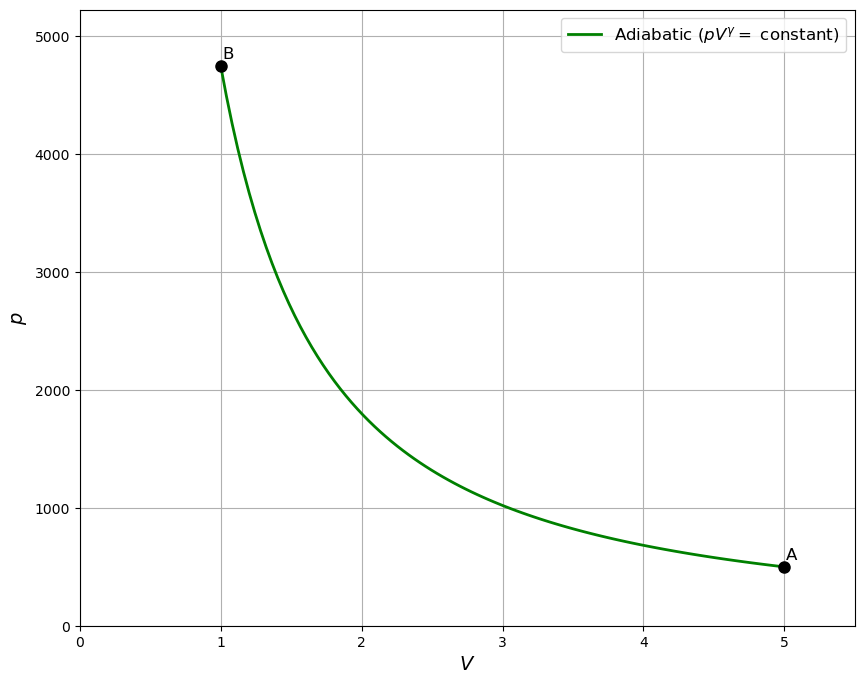

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# n = number of moles, R = ideal gas constant (J/(mol*K)), T = temperature (K)
n = 1.0
R = 8.314
T_initial = 300  # Initial temperature in Kelvin
gamma = 1.4      # Adiabatic index for a diatomic ideal gas

# Define the initial and final volumes for the processes
V_initial = 5.0  # Initial volume in m^3
V_final = 1.0    # Final volume in m^3

# Define a common initial pressure
P_initial = (n * R * T_initial) / V_initial

# Define the range of volumes for the plot
V = np.linspace(V_initial, V_final, 100)

# 1. Isobaric Process (Constant Pressure)
p_isobaric = np.full_like(V, P_initial)
P_final_isobaric = P_initial

# 2. Isothermal Process (Constant Temperature)
constant_isothermal = P_initial * V_initial
p_isothermal = constant_isothermal / V
P_final_isothermal = constant_isothermal / V_final

# 3. Adiabatic Process (No Heat Transfer)
constant_adiabatic = P_initial * (V_initial**gamma)
p_adiabatic = constant_adiabatic / (V**gamma)
P_final_adiabatic = constant_adiabatic / (V_final**gamma)

# Plotting
plt.figure(figsize=(10, 8))
#plt.plot(V, p_isobaric, label='Isobaric ($p=$ constant)', color='blue', linewidth=2)
#plt.plot(V, p_isothermal, label='Isothermal ($pV=$ constant)', color='red', linewidth=2)
plt.plot(V, p_adiabatic, label='Adiabatic ($pV^{\gamma}=$ constant)', color='green', linewidth=2)

# Add a marker for the initial state "A"
plt.plot(V_initial, P_initial, 'o', color='black', markersize=8)
plt.annotate('A', xy=(V_initial, P_initial), xytext=(5, 5), textcoords='offset points', ha='center', fontsize=12)

# Add markers and labels for the final states "B"
#plt.plot(V_final, P_final_isobaric, 'o', color='black', markersize=8)
#plt.annotate('B_isobaric', xy=(V_final, P_final_isobaric), xytext=(5, 5), textcoords='offset points', ha='center', fontsize=12)

#plt.plot(V_final, P_final_isothermal, 'o', color='black', markersize=8)
#plt.annotate('B_isothermal', xy=(V_final, P_final_isothermal), xytext=(5, 5), textcoords='offset points', ha='center', fontsize=12)

plt.plot(V_final, P_final_adiabatic, 'o', color='black', markersize=8)
plt.annotate('B', xy=(V_final, P_final_adiabatic), xytext=(5, 5), textcoords='offset points', ha='center', fontsize=12)

# Add labels and title
plt.xlabel('$V$', fontsize=14)
plt.ylabel('$p$', fontsize=14)

# Add grid and legend
plt.grid(True)
plt.legend(fontsize=12)

# Set axis limits
plt.xlim(0, V_initial * 1.1)
max_p = max(P_final_adiabatic, P_final_isothermal, P_final_isobaric)
plt.ylim(0, max_p * 1.1)

# Show the plot
plt.savefig('p-V-compression-adiabatic.pdf')
plt.show()

## Reasoning
Does this make sense?
